# Two Sample T-Test

Two-sample tests are appropriate for comparing two samples, typically experimental and control samples from a scientifically controlled experiment.

https://en.wikipedia.org/wiki/Test_statistic

Two-sample z-test	

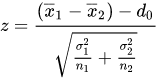

Normal population and independent observations and σ1 and σ2 are known

In [2]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power

### Example 1
Energy intake in mJ (millijoule) and wether obese or not (0=obese, 1=lean)

### Independent Two-Sample t-test

Equal sample sizes and variance
Given two groups (1, 2), this test is only applicable when:

the two sample sizes (that is, the number n of participants of each group) are equal;
it can be assumed that the two distributions have the same variance;
Violations of these assumptions are discussed below.

The t statistic to test whether the means are different can be calculated as follows:
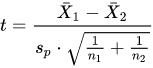

where
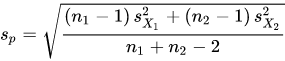

Here sp is the pooled standard deviation for n = n1 = n2 and s 2
X1 and s 2
X2 are the unbiased estimators of the variances of the two samples. The denominator of t is the standard error of the difference between two means.

For significance testing, the degrees of freedom for this test is 2n − 2 where n is the number of participants in each group.

Equal or unequal sample sizes, similar variances (sX1 > 2sX2 or sX2 > 2sX1)

This test is used only when it can be assumed that the two distributions have the same variance. (When this assumption is violated, see below.) The previous formulae are a special case of the formulae below, one recovers them when both samples are equal in size: n = n1 = n2.

The t statistic to test whether the means are different can be calculated as follows:
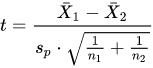
where
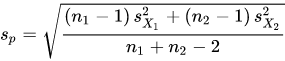

is an estimator of the pooled standard deviation of the two samples: it is defined in this way so that its square is an unbiased estimator of the common variance whether or not the population means are the same. In these formulae, ni − 1 is the number of degrees of freedom for each group, and the total sample size minus two (that is, n1 + n2 − 2) is the total number of degrees of freedom, which is used in significance testing.

Equal or unequal sample sizes, unequal variances (sX1 > 2sX2 or sX2 > 2sX1)
Main article: Welch's t-test
This test, also known as Welch's t-test, is used only when the two population variances are not assumed to be equal (the two sample sizes may or may not be equal) and hence must be estimated separately. The t statistic to test whether the population means are different is calculated as:
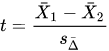

where
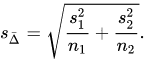

Here si2 is the unbiased estimator of the variance of each of the two samples with ni = number of participants in group i (1 or 2). In this case {\textstyle (s_{\bar {\Delta }})^{2}}{\textstyle (s_{\bar {\Delta }})^{2}} is not a pooled variance. For use in significance testing, the distribution of the test statistic is approximated as an ordinary Student's t-distribution with the degrees of freedom calculated using
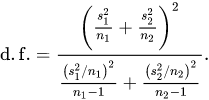

This is known as the Welch–Satterthwaite equation. The true distribution of the test statistic actually depends (slightly) on the two unknown population variances (see Behrens–Fisher problem).


In [3]:
energ = np.array([
[9.21, 0],
[7.53, 1],
[7.48, 1],
[8.08, 1],
[8.09, 1],
[10.15, 1],
[8.40, 1],
[10.88, 1],
[6.13, 1],
[7.90, 1],
[11.51, 0],
[12.79, 0],
[7.05, 1],
[11.85, 0],
[9.97, 0],
[7.48, 1],
[8.79, 0],
[9.69, 0],
[9.68, 0],
[7.58, 1],
[9.19, 0],
[8.11, 1]])

In [8]:
# Seperating the data into 2 groups
gp1 = energ[ energ[:, 1] == 1][:,0]
gp2 = energ[ energ[:, 1] == 0][:, 0]
gp1, gp2

(array([ 7.53,  7.48,  8.08,  8.09, 10.15,  8.4 , 10.88,  6.13,  7.9 ,
         7.05,  7.48,  7.58,  8.11]),
 array([ 9.21, 11.51, 12.79, 11.85,  9.97,  8.79,  9.69,  9.68,  9.19]))

In [10]:
# two-sample t-test
# null hypothesis: the two groups have the same mean
# this test assumes the two groups have the same variance...
# (can be checked with tests for equal variance - Levene)
# independent groups: e.g., how boys and girls fare at an exam
# dependent groups: e.g., how the same class fare at 2 different exams
t_stat, p_value = ttest_ind(gp1, gp2)
print(t_stat, p_value)

-3.9455649161549835 0.0007989982111700593


In [11]:
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= 0.0007989982111700593


### Dependent t-test for paired samples

This test is used when the samples are dependent; that is, when there is only one sample that has been tested twice (repeated measures) or when there are two samples that have been matched or "paired". This is an example of a paired difference test. The t statistic is calculated as

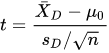

where {\displaystyle {\bar {X}}_{D}}{\displaystyle {\bar {X}}_{D}} and {\displaystyle s_{D}}{\displaystyle s_{D}} are the average and standard deviation of the differences between all pairs. The pairs are e.g. either one person's pre-test and post-test scores or between-pairs of persons matched into meaningful groups (for instance drawn from the same family or age group: see table). The constant μ0 is zero if we want to test whether the average of the difference is significantly different. The degree of freedom used is n − 1, where n represents the number of pairs.


### Example
Pre and Post surgery energy intake

In [13]:
# pre and post-surgery energy intake
intake = np.array([
[5260, 3910],
[5470, 4220],
[5640, 3885],
[6180, 5160],
[6390, 5645],
[6515, 4680],
[6805, 5265],
[7515, 5975],
[7515, 6790],
[8230, 6900],
[8770, 7335],
])

In [14]:
# Seperating data into 2 groups
pre = intake[:, 0]
post = intake[:, 1]

In [15]:
# Paired t-test: doing two measurements on the same experiment unit
t_stat_paired, p_value_paired = ttest_1samp(post - pre, popmean=0)
print(t_stat_paired, p_value_paired)

-11.941392877647603 3.059020942934875e-07


In [20]:
# p < 0.05 => alternative hypothesis:
# the difference in mean is not equal to 0
print ("paired t-test p-value=", p_value_paired)
print('This is much less than alpha, so Ho is rejected. There is a significant difference between patient \
intake before and after sugery')

paired t-test p-value= 3.059020942934875e-07
This is much less than alpha, so Ho is rejected. There is a significant difference between patient intake before and after sugery


In [ ]:
#print(ttest_power(0.587, nobs=22, alpha=0.10, alternative='two-sided'))

## Test of Proportions

Tests of proportions are analogous to tests of means (the 50% proportion).


In [22]:
from scipy.stats import f
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
smokers_df = pd.read_csv('data/insurance.csv')

In [24]:
smokers_df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1208,37,female,25.555,1,yes,northeast,20296.86345
1332,52,female,44.700,3,no,southwest,11411.68500
799,33,male,24.795,0,yes,northeast,17904.52705
329,52,male,36.700,0,no,southwest,9144.56500
886,57,male,28.975,0,yes,northeast,27218.43725


In [25]:
# Test of proportions
# 'sex' and 'smoker' are two categorical variables
# We want to see if the proportion of smokers in the female population is significantly less than it is in the male population
# Ho = The proportions are equal
# Ha = The two proportions are not equal

In [43]:
n_female_smokers = smokers_df.loc[(smokers_df['sex']=='female') & (smokers_df['smoker']=='yes')].shape[0]
n_male_smokers = smokers_df.loc[(smokers_df['sex']=='male') & (smokers_df['smoker']=='yes')].shape[0]
n_females = smokers_df[smokers_df['sex']=='female'].shape[0]
n_males = smokers_df[smokers_df['sex']=='male'].shape[0]

In [46]:
print([n_female_smokers, n_male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(n_female_smokers/n_females,2)}%, \
      {round(n_male_smokers/n_males,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%,       0.24% respectively


In [47]:
from statsmodels.stats.proportion import proportions_ztest



In [49]:
stat, p_value_prop = proportions_ztest([n_female_smokers, n_male_smokers], [n_females, n_males])

In [51]:
if p_value_prop < 0.05:
    print(f'With a p-value of {round(p_value_prop,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(p_value_prop,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0053 the difference is significant. aka |We reject the null|
